In [1]:
! pip install tensorflow

  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\5c\2e\7e\a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\ee\98\38\46cbcc5a93cfea5492d19c38562691ddb23b940176c14f7b48
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built gast absl-py termcolor


## 使用Tensorflow 分類MNIST 數據

In [2]:
import tensorflow as tf

In [3]:
import os
os.mkdir('mnist')

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist", one_hot=True)

W0817 09:46:32.937018  5792 deprecation.py:323] From <ipython-input-4-91ef6a97d5b7>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0817 09:46:32.938018  5792 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0817 09:46:32.939018  5792 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./mnist\train-images-idx3-ubyte.gz


W0817 09:46:33.677061  5792 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0817 09:46:33.679060  5792 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./mnist\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist\t10k-images-idx3-ubyte.gz


W0817 09:46:33.882072  5792 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist\t10k-labels-idx1-ubyte.gz


### One Hot
- [小資女, 貴婦, 學生, 小資女, 貴婦] 
- [1,2,0,1,2]

        ``` 
        [
        [0,1,0],
        [0,0,1],
        [1,0,0],
        [0,1,0],
        [0,0,1],

        ]
        ```

### 檢視數據

In [5]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000000000A8A1BE0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000000115853C8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000000124B8860>)

In [8]:
mnist.train.labels.shape

(55000, 10)

In [7]:
mnist.train.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [10]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [11]:
import numpy
numpy.argmax(mnist.train.labels[0])

7

In [12]:
mnist.test.labels.shape

(10000, 10)

In [15]:
mnist.train.images.shape

(55000, 784)

In [13]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
mnist.train.images[0].shape

(784,)

In [24]:
#mnist.train.images[0].reshape((392,2))

In [21]:
sample_image = mnist.train.images[0].reshape((28,28))

In [22]:
sample_image.shape

(28, 28)

Populating the interactive namespace from numpy and matplotlib


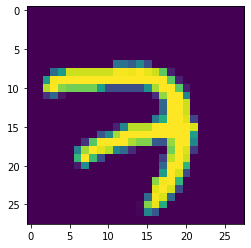

In [25]:
%pylab inline
import matplotlib.pyplot as plt

plt.imshow(sample_image)

### 設定網路參數

In [26]:
learning_rate   = 0.001
training_epochs = 15
batch_size      = 100

In [27]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 
n_samples  = mnist.train.num_examples

- 784 (input) => hidden1(256) => hidden2(256) => output(10)

### 定義Input & Output (Placeholder)

In [28]:
x = tf.placeholder("float", [None, n_input]) # 784 pixels
y = tf.placeholder("float", [None, n_classes]) # 10 digits

### 建構神經網路

In [29]:
def multilayer_perceptron(x, weights, biases):  
    # First Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1']) # W * X + B
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

### 設定權重與偏倚(Variable)

In [30]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])), # 784 * 256
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])), # 256 * 256
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))# 256 * 10
}

In [31]:

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])), # 256
    'b2': tf.Variable(tf.random_normal([n_hidden_2])), # 256
    'out': tf.Variable(tf.random_normal([n_classes]))  # 10 
}

### 建立模型

In [32]:
pred = multilayer_perceptron(x, weights, biases)

### 設定代價函數

- 784 (input) => hidden1(256) => hidden2(256) => output(10) => SoftMax => Cross Entropy

In [33]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

W0817 10:05:25.782813  5792 deprecation.py:323] From <ipython-input-33-c98ca870291b>:1: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### 初始化變量

In [34]:
init = tf.global_variables_initializer()

### 執行會話

In [35]:
# Start the session
sess = tf.InteractiveSession()

# Intialize all the variables
sess.run(init)

for epoch in range(training_epochs):

    # Initial the cost = 0.0
    avg_cost = 0.0

    total_batch = int(n_samples/batch_size) # 55000 / 100 = 550

    for i in range(total_batch): # 550

        batch_x, batch_y = mnist.train.next_batch(batch_size) # 100
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

        # Compute average loss
        avg_cost += c / total_batch

    print("Epoch: {} cost={}".format(epoch+1,avg_cost))

print("Training Completed in {} Epochs".format(training_epochs))

Epoch: 1 cost=162.63954968539153
Epoch: 2 cost=58.55973821640019
Epoch: 3 cost=42.77415552486071
Epoch: 4 cost=34.342986064390715
Epoch: 5 cost=29.041468033357106
Epoch: 6 cost=25.374405524947438
Epoch: 7 cost=22.484230911081493
Epoch: 8 cost=20.2814972386577
Epoch: 9 cost=18.46488879030401
Epoch: 10 cost=16.913518527773288
Epoch: 11 cost=15.684016455303532
Epoch: 12 cost=14.505820028375492
Epoch: 13 cost=13.619367648999802
Epoch: 14 cost=12.714606029770584
Epoch: 15 cost=11.960446925921866
Training Completed in 15 Epochs


### 評估模型

In [36]:
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [37]:
correct_predictions = tf.cast(correct_predictions, "float")

In [38]:
accuracy = tf.reduce_mean(correct_predictions)

In [39]:
print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.9136


## 使用TensorBoard 視覺化呈現網路建構過程

### 讀取MNIST數據集

In [40]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist", one_hot=True)

Extracting ./mnist\train-images-idx3-ubyte.gz
Extracting ./mnist\train-labels-idx1-ubyte.gz
Extracting ./mnist\t10k-images-idx3-ubyte.gz
Extracting ./mnist\t10k-labels-idx1-ubyte.gz


### 設定網路參數

In [41]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [42]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 
n_samples  = mnist.train.num_examples

### 定義Placeholders

In [43]:
with tf.name_scope('inputs'):
    x = tf.placeholder("float", [None, n_input],   name= 'input_x')
    y = tf.placeholder("float", [None, n_classes], name= 'input_y')

### 產生影像檔

In [44]:
with tf.name_scope('input_reshape'):
    image_input = tf.reshape(x,[-1,28,28,1])
    tf.summary.image('input', image_input, 10)

### 建構多層神經網路

In [45]:
def add_layer(x, input_tensors, output_tensors, layer_name, activation_function = None):  
    with tf.name_scope('Layer'):
        with tf.name_scope('Weights'):
            weight = tf.Variable(tf.random_normal([input_tensors, output_tensors]), name = 'w')
            tf.summary.histogram(name = layer_name + '/Weights', values = weight)
        with tf.name_scope('Bias'):
            bias = tf.Variable(tf.random_normal([output_tensors]), name= 'b')
            tf.summary.histogram(name = layer_name + '/Bias', values = bias)
        with tf.name_scope('Wx_plus_b'):
            formula = tf.add(tf.matmul(x, weight), bias)
            
        if activation_function is None:
            outputs = formula
        else:
            outputs = activation_function(formula)
            
        tf.summary.histogram(name = layer_name + '/Outputs', values = outputs)
        return outputs

### 添加隱藏層

In [46]:
layer1 = add_layer(x, input_tensors = n_input, output_tensors = n_hidden_1, layer_name='layer1',activation_function = tf.nn.relu)
layer2 = add_layer(layer1, input_tensors = n_hidden_1, output_tensors = n_hidden_2, layer_name='layer2',activation_function = tf.nn.relu)
out_layer = add_layer(layer2, input_tensors = n_hidden_2, output_tensors = n_classes, layer_name='out_layer',activation_function = None)

### 設定代價函數

In [47]:
with tf.name_scope('cost'):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=out_layer, labels=y))
    tf.summary.scalar('loss', cost)
    
with tf.name_scope('optimizer'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    
with tf.name_scope('Accuracy'):
    acc = tf.equal(tf.argmax(out_layer, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(acc, tf.float32))
    tf.summary.scalar("accuracy", acc)

### 初始化變量

In [48]:
init = tf.global_variables_initializer()

### 訓練模型

In [49]:
merged = tf.summary.merge_all()

with tf.Session() as sess:
    sess.run(init)

    ## Merge Summary
    
    writer = tf.summary.FileWriter("tensorboard3/", graph = sess.graph)

    for epoch in range(training_epochs):
        avg_cost = 0.0
        total_batch = int(n_samples/batch_size)
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            _, c, result = sess.run([optimizer, cost, merged], feed_dict={x: batch_x, y: batch_y})
            avg_cost += c / total_batch
            ## Adding summary of each step
            writer.add_summary(result,  epoch * total_batch + i)

        print("Epoch: {} cost={}".format(epoch+1,avg_cost))

    print("Training Completed in {} Epochs".format(training_epochs))

Epoch: 1 cost=158.2789852697198
Epoch: 2 cost=61.26732438694344
Epoch: 3 cost=45.19476784359327
Epoch: 4 cost=36.654014079353985
Epoch: 5 cost=31.002138905525197
Epoch: 6 cost=27.05141910119492
Epoch: 7 cost=24.055611841678633
Epoch: 8 cost=21.74014560786156
Epoch: 9 cost=19.77620756062594
Epoch: 10 cost=18.164622361985124
Epoch: 11 cost=16.743623175390738
Epoch: 12 cost=15.541510716568329
Epoch: 13 cost=14.447600691318511
Epoch: 14 cost=13.61334546051242
Epoch: 15 cost=12.724130941900336
Training Completed in 15 Epochs


### 打開tensorboard

- 打開 anaconda prompt
- tensorboard --logdir tensorboard3/ --host 127.0.0.1
- http://127.0.0.1:6006

In [50]:
f = open('123.txt' , 'w')
f.write('123')
f.close()

In [51]:
with open('123.txt' , 'w') as f:
    f.write('123')

## Keras 安裝

In [52]:
! pip install keras

In [53]:
import keras

Using TensorFlow backend.


## 使用Keras 分類MNIST 數據

### 引用Keras 套件

In [55]:
import keras
from keras.datasets import mnist
from keras.models   import Sequential
from keras.optimizers import SGD
from keras.layers import Activation, Dense # W * X + B

### 讀取MNIST 數據

In [56]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 15s 1us/step


In [57]:
x_train.shape

(60000, 28, 28)

In [58]:
x_test.shape

(10000, 28, 28)

In [59]:
y_train.shape

(60000,)

In [60]:
y_test.shape

(10000,)

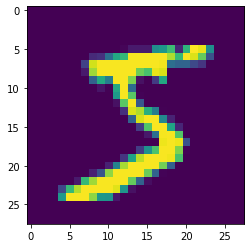

In [63]:
plt.imshow(x_train[0])

In [65]:
y_train[0]

5

In [67]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [68]:
x_train.shape

(60000, 784)

In [69]:
x_test.shape

(10000, 784)

In [70]:
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

In [73]:
x_train[0].min(),x_train[0].max() 

(0.0, 255.0)

In [74]:
x_train /= 255
x_test  /= 255

In [75]:
x_train[0].min(),x_train[0].max() 

(0.0, 1.0)

In [76]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [77]:
n_classes  = 10 
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test, n_classes)

In [78]:
y_train.shape

(60000, 10)

In [80]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### 設定網路參數

In [81]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 

training_epochs = 15
batch_size = 100

### 建立神經網路

In [82]:
model = keras.Sequential()
model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_classes,  activation='softmax'))

W0817 11:09:27.589248  5792 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0817 11:09:27.591248  5792 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0817 11:09:27.595249  5792 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [83]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

W0817 11:09:59.606080  5792 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0817 11:09:59.632081  5792 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



###  訓練神經網路

In [84]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

W0817 11:11:05.946874  5792 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0817 11:11:05.992877  5792 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 27us/step - loss: 1.0076 - acc: 0.7610 - val_loss: 0.4724 - val_acc: 0.8842
Epoch 2/15
60000/60000 [==============================] - 2s 27us/step - loss: 0.4167 - acc: 0.8876 - val_loss: 0.3497 - val_acc: 0.9039
Epoch 3/15
60000/60000 [==============================] - 2s 26us/step - loss: 0.3408 - acc: 0.9033 - val_loss: 0.3056 - val_acc: 0.9164
Epoch 4/15
60000/60000 [==============================] - 2s 26us/step - loss: 0.3048 - acc: 0.9129 - val_loss: 0.2782 - val_acc: 0.9215
Epoch 5/15
60000/60000 [==============================] - 2s 26us/step - loss: 0.2803 - acc: 0.9195 - val_loss: 0.2592 - val_acc: 0.9264
Epoch 6/15
60000/60000 [==============================] - 2s 25us/step - loss: 0.2608 - acc: 0.9253 - val_loss: 0.2428 - val_acc: 0.9328
Epoch 7/15
60000/60000 [==============================] - 2s 25us/step - loss: 0.2448 - acc: 0.9296 - val_loss: 0.2296 - val_acc

In [86]:
predicted = model.predict(x_test)

In [89]:
import numpy
predicted_y = numpy.argmax(predicted, 1)

In [90]:
real_y = numpy.argmax(y_test, 1)

In [91]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(real_y, predicted_y)

0.9533

In [92]:
confusion_matrix(real_y, predicted_y)

array([[ 967,    0,    1,    2,    0,    4,    4,    1,    1,    0],
       [   0, 1118,    2,    2,    1,    1,    4,    2,    5,    0],
       [   8,    1,  982,    8,    5,    1,    7,    7,   11,    2],
       [   0,    1,   14,  953,    0,   20,    0,   10,   10,    2],
       [   1,    1,    5,    0,  935,    0,   11,    4,    3,   22],
       [   9,    1,    0,   12,    3,  847,    9,    0,    6,    5],
       [  10,    3,    3,    1,    7,   12,  920,    1,    1,    0],
       [   2,    8,   23,    4,    3,    2,    0,  967,    2,   17],
       [   3,    2,    5,   15,    7,   14,   10,    6,  909,    3],
       [   9,    8,    1,    9,   23,    7,    1,   10,    6,  935]],
      dtype=int64)

## 使用Keras 分類 IRIS

In [93]:
from sklearn.datasets import load_iris
iris = load_iris()

In [97]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset = sc.fit_transform(iris.data)

In [99]:
#dataset

In [101]:
y = keras.utils.to_categorical(iris.target, 3)

In [103]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset, y, test_size = 0.2, random_state = 123)

In [104]:
x_train.shape

(120, 4)

In [105]:
x_test.shape

(30, 4)

In [106]:
y_train.shape

(120, 3)

In [107]:
y_test.shape

(30, 3)

### 任務:
- 使用Keras 建構一深度學習模型來分類iris 資料

In [108]:
n_classes  = 3
n_input    = 4
n_hidden_1 = 5
n_hidden_2 = 5

In [109]:
model = keras.Sequential()
model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_classes,  activation='softmax'))

In [110]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [113]:
history = model.fit(x_train, y_train,
                    batch_size=10,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 120 samples, validate on 30 samples
Epoch 1/10
120/120 [==============================] - 0s 133us/step - loss: 0.1300 - acc: 0.9583 - val_loss: 0.1832 - val_acc: 0.9667
Epoch 2/10
120/120 [==============================] - 0s 125us/step - loss: 0.1284 - acc: 0.9667 - val_loss: 0.1806 - val_acc: 0.9667
Epoch 3/10
120/120 [==============================] - 0s 83us/step - loss: 0.1283 - acc: 0.9583 - val_loss: 0.1812 - val_acc: 0.9667
Epoch 4/10
120/120 [==============================] - 0s 92us/step - loss: 0.1269 - acc: 0.9667 - val_loss: 0.1799 - val_acc: 0.9667
Epoch 5/10
120/120 [==============================] - 0s 100us/step - loss: 0.1256 - acc: 0.9667 - val_loss: 0.1795 - val_acc: 0.9667
Epoch 6/10
120/120 [==============================] - 0s 83us/step - loss: 0.1250 - acc: 0.9667 - val_loss: 0.1777 - val_acc: 0.9667
Epoch 7/10
120/120 [==============================] - 0s 83us/step - loss: 0.1243 - acc: 0.9667 - val_loss: 0.1783 - val_acc: 0.9667
Epoch 8/10
120/120 [=

In [116]:
predict_y = numpy.argmax(model.predict(x_test),axis = 1)

In [117]:
real_y = numpy.argmax(y_test,axis = 1)

In [118]:
accuracy_score(real_y, predict_y)

0.9666666666666667

In [119]:
confusion_matrix(real_y, predict_y)

array([[13,  0,  0],
       [ 0,  6,  0],
       [ 0,  1, 10]], dtype=int64)

In [128]:
model = keras.Sequential()
model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_classes,  activation='softmax'))

In [129]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [130]:
savetb = keras.callbacks.TensorBoard(log_dir="./tb3")

history = model.fit(x_train, y_train,
                    batch_size=10,
                    epochs=100,
                    verbose=0,
                    validation_data=(x_test, y_test),
                    callbacks=[savetb])

### 層級資料格式（Hierarchical Data Format：HDF）
- 是設計用來儲存和組織大量資料的一組檔案格式（HDF4，HDF5）。它最初開發於美國國家超級計算應用中心，現在由非營利社團HDF Group支援，其任務是確保HDF5技術的持續開發和儲存在HDF中資料的持續可存取性。
- https://zh.wikipedia.org/wiki/HDF

In [136]:
?model.save

In [131]:
model.save('iris.hd5')

In [137]:
?model.save_weights

In [133]:
model2 = keras.models.load_model('iris.hd5')

In [134]:
predict_y = numpy.argmax(model2.predict(x_test),axis = 1)

In [135]:
predict_y

array([2, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 2, 0], dtype=int64)

In [138]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 5)                 25        
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 18        
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [146]:
model.layers[0].get_weights()

[array([[-0.8556102 ,  0.10812764, -0.29156172, -0.16002828, -0.51679444],
        [-0.62004566, -0.69640493, -0.23586531,  0.03217382,  0.6560474 ],
        [ 0.29546788,  0.9895802 , -0.00458705,  0.19554622, -0.8726329 ],
        [-0.49753076,  0.5048425 , -0.04925686,  0.9805014 , -0.41607448]],
       dtype=float32),
 array([ 0.28729242,  0.13386457,  0.03886611, -0.11620525,  0.28713062],
       dtype=float32)]

## Flask
- https://flask.palletsprojects.com/en/1.0.x/

## 使用API 調用類神經網路模型

In [148]:
from flask import Flask
app = Flask(__name__)

@app.route('/')
def hello_world():
    return 'Hello, World!'

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


I0817 12:21:41.227059  5792 _internal.py:122]  * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
I0817 12:21:44.891269  6420 _internal.py:122] 127.0.0.1 - - [17/Aug/2019 12:21:44] "GET / HTTP/1.1" 200 -
I0817 12:21:44.943272  5884 _internal.py:122] 127.0.0.1 - - [17/Aug/2019 12:21:44] "GET /favicon.ico HTTP/1.1" 404 -


In [187]:
x_test[1]
1.15917263,-0.13197948,0.99010798,1.18556721

array([ 1.15917263, -0.13197948,  0.99010798,  1.18556721])

In [ ]:
from flask import Flask
import keras
import numpy
app = Flask(__name__)

@app.route('/<x_test>')
def hello_world(x_test):
    x = numpy.array(x_test.split(','))
    model2 = keras.models.load_model('iris.hd5')
    print(x.reshape(1,4))
    predict_y = numpy.argmax(model2.predict(x.reshape(1,4)),axis = 1)
    return str(int(predict_y))
app.run()

In [168]:
x = numpy.array('0.55333328,-1.28296331,0.64908342,0.3957741'.split(','))

In [169]:
model2 = keras.models.load_model('iris.hd5')
predict_y = numpy.argmax(model2.predict(x.reshape(1,4)),axis = 1)

In [180]:
type(int(predict_y[0]))

int

## 使用類神經網路建立客戶流失預測模型

In [190]:
l = [1,2,3,4, 's']
l.append('hello')
l

[1, 2, 3, 4, 's', 'hello']

In [191]:
import numpy
li = [1,2,3,4,5]
ary = numpy.array([1,2,3,4,5])
ary

array([1, 2, 3, 4, 5])

In [192]:
ary.sum()

15

In [193]:
ary.mean()

3.0

In [195]:
ary = numpy.array([[1,2,3,4,5],['A','B','C','D', 'E']])
ary

array([['1', '2', '3', '4', '5'],
       ['A', 'B', 'C', 'D', 'E']], dtype='<U11')

In [198]:
import pandas
df = pandas.DataFrame([[1,2,3,4,5],['A','B','C','D', 'E']])
df = df.T

In [200]:
df.columns = ['val','col']
df

,val,col
0,1,A
1,2,B
2,3,C
3,4,D
4,5,E


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
val    5 non-null object
col    5 non-null object
dtypes: object(2)
memory usage: 160.0+ bytes


In [202]:
df['val'] = df['val'].astype(int)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
val    5 non-null int32
col    5 non-null object
dtypes: int32(1), object(1)
memory usage: 140.0+ bytes


In [204]:
df['val'].sum()

15

### 讀取客戶流失數據

In [205]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/customer_churn.csv', index_col=0, header = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 1 to 3333
Data columns (total 20 columns):
state                            3333 non-null object
account_length                   3333 non-null int64
area_code                        3333 non-null object
international_plan               3333 non-null object
voice_mail_plan                  3333 non-null object
number_vmail_messages            3333 non-null int64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null int64
total_night_charge               3333 non-null float64
total_intl_minutes               3333 non-null float64
total_intl_calls           

In [210]:
#iris.data

### 資料預處理

In [213]:
#df.iloc[列,欄]
df = df.iloc[:,3:]

In [216]:
df.select_dtypes('object').head()

,international_plan,voice_mail_plan,churn
1,no,yes,no
2,no,yes,no
3,no,no,no
4,yes,no,no
5,yes,no,no


In [218]:
df['international_plan'].unique()

array(['no', 'yes'], dtype=object)

In [219]:
df['voice_mail_plan'].unique()

array(['yes', 'no'], dtype=object)

In [220]:
df['churn'].unique()

array(['no', 'yes'], dtype=object)

In [221]:
df['international_plan'] = df['international_plan'].replace({'yes':1, 'no':0})

In [222]:
df['voice_mail_plan'] = df['voice_mail_plan'].replace({'yes':1, 'no':0})

In [223]:
df['churn'] = df['churn'].replace({'yes':1, 'no':0})

In [224]:
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
2,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
3,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
5,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### 資料標準化

In [231]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [232]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

### 建構模型

In [233]:
df.shape

(3333, 17)

In [234]:
x.shape

(3333, 16)

In [235]:
y.shape

(3333,)

In [236]:
model = keras.Sequential()
model.add(Dense(8, activation='relu', input_shape=(16,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,  activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [239]:
history = model.fit(x_scaled, y,
                    batch_size=100,
                    epochs=30,
                    verbose=1)

Epoch 1/30
3333/3333 [==============================] - 0s 12us/step - loss: 0.2036 - acc: 0.9349
Epoch 2/30
3333/3333 [==============================] - 0s 8us/step - loss: 0.2035 - acc: 0.9349
Epoch 3/30
3333/3333 [==============================] - 0s 8us/step - loss: 0.2033 - acc: 0.9346
Epoch 4/30
3333/3333 [==============================] - 0s 8us/step - loss: 0.2032 - acc: 0.9355
Epoch 5/30
3333/3333 [==============================] - 0s 8us/step - loss: 0.2031 - acc: 0.9337
Epoch 6/30
3333/3333 [==============================] - 0s 7us/step - loss: 0.2029 - acc: 0.9343
Epoch 7/30
3333/3333 [==============================] - 0s 11us/step - loss: 0.2028 - acc: 0.9346
Epoch 8/30
3333/3333 [==============================] - 0s 9us/step - loss: 0.2027 - acc: 0.9352
Epoch 9/30
3333/3333 [==============================] - 0s 8us/step - loss: 0.2026 - acc: 0.9340
Epoch 10/30
3333/3333 [==============================] - 0s 10us/step - loss: 0.2025 - acc: 0.9358
Epoch 11/30
3333/3333 [===

In [241]:
predicted = model.predict(x_scaled)

In [244]:
(predicted > 0.5).shape

(3333, 1)

In [245]:
(predicted > 0.5)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [248]:
predict_y = (predicted > 0.5).flatten().astype(int)

In [249]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y, predict_y)

0.9372937293729373

In [250]:
confusion_matrix(y, predict_y)

array([[2798,   52],
       [ 157,  326]], dtype=int64)

In [251]:
(2798 + 326) / (2798 + 326 + 52 + 157)

0.9372937293729373

## 使用Keras 預測金融客戶流失

In [261]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/Churn_Modelling.csv', header = 0 )
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [262]:
df = df.iloc[:,3:]

In [263]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [264]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [266]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [267]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [268]:
x.select_dtypes('object').head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [269]:
x['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [272]:
geo = pandas.get_dummies(x['Geography'])
del geo['Spain']
geo.head()

,France,Germany
0,1,0
1,0,0
2,1,0
3,1,0
4,0,0


In [275]:
x = pandas.concat([x, geo], axis = 1)
del x['Geography']
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany
0,619,Female,42,2,0.00,1,1,1,101348.88,1,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,699,Female,39,1,0.00,2,0,0,93826.63,1,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0


In [276]:
x['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [277]:
x['Gender'] = x['Gender'].replace({'Male':1, 'Female':0})

In [279]:
x.head(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0


In [280]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

## 任務:
請使用Keras 建構一客戶流失預測模型

In [283]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [284]:
x_scaled.shape

(10000, 11)

In [291]:
model = keras.Sequential()
model.add(Dense(5, activation='relu', input_shape=(11,)))
model.add(Dense(5, activation='relu'))
model.add(Dense(1,  activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [292]:
history = model.fit(x_scaled, y,
                    batch_size=100,
                    epochs=300,
                    verbose=0)

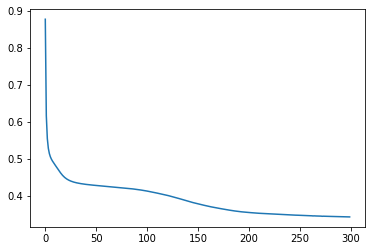

In [293]:
plt.plot(range(300), history.history.get('loss'))

In [295]:
predicted = model.predict(x_scaled )

In [299]:
predict_y = (predicted > 0.5).flatten().astype(int)

In [300]:
accuracy_score(y, predict_y)

0.8584

In [301]:
confusion_matrix(y, predict_y)

array([[7661,  302],
       [1114,  923]], dtype=int64)

## Dummy Variable

In [309]:
a = pandas.DataFrame(['A','B','C', 'B', 'A','C'], columns=['area'])
a

,area
0,A
1,B
2,C
3,B
4,A
5,C


### Method 1

In [311]:
pandas.get_dummies(a['area'])

,A,B,C
0,1,0,0
1,0,1,0
2,0,0,1
3,0,1,0
4,1,0,0
5,0,0,1


### Method 2

In [317]:
a['area'].values.reshape(-1,1)

array([['A'],
       ['B'],
       ['C'],
       ['B'],
       ['A'],
       ['C']], dtype=object)

In [319]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()
X = oh.fit_transform(a['area'].values.reshape(-1,1))
X.toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [321]:
a['area'].replace({'A':3, 'B':2, 'C':1})

0    3
1    2
2    1
3    2
4    3
5    1
Name: area, dtype: int64

## Optimizer
- https://github.com/Jaewan-Yun/optimizer-visualization

## 比較優化器

### 讀取客戶流失數據

In [322]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/customer_churn.csv', index_col=0, header = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


### 數據預處理

In [323]:
df = df.iloc[:,3:]

In [324]:
cat_var = ['international_plan','voice_mail_plan', 'churn']

for var in cat_var:
    df[var] = df[var].replace({'yes': 1, 'no':0})

In [325]:
y = df.iloc[:,-1]
x = df.iloc[:,:-1]

###  區分訓練與測試數據集

In [326]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size = 0.33, random_state = 42)

### 資料標準化

In [336]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [337]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [338]:
def tarinProcess(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    history = classifier.fit(x_train, y_train,
                        batch_size=10,
                        epochs=100,
                        verbose=0,
                        validation_data=(x_test, y_test))
    return history

In [339]:
history1 = tarinProcess('sgd')

In [340]:
history2 = tarinProcess('RMSprop')

In [341]:
history3 = tarinProcess('Adagrad')

In [342]:
history4 = tarinProcess('Adadelta')

In [343]:
history5 = tarinProcess('Adam')

Populating the interactive namespace from numpy and matplotlib


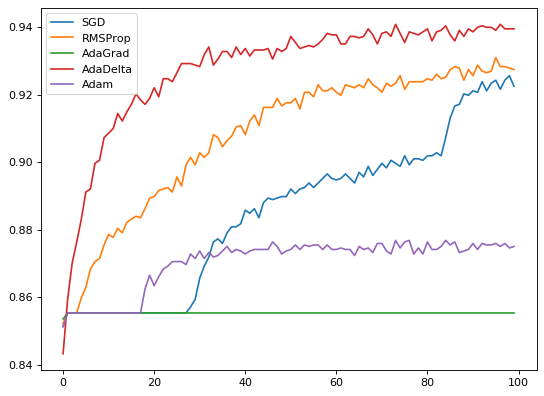

In [344]:
%pylab inline
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(history1.epoch, history1.history['acc'], label='SGD')
plt.plot(history2.epoch, history2.history['acc'], label='RMSProp')
plt.plot(history3.epoch, history3.history['acc'], label='AdaGrad')
plt.plot(history4.epoch, history4.history['acc'], label='AdaDelta')
plt.plot(history5.epoch, history5.history['acc'], label='Adam')
plt.legend()
plt.show()

## 交叉驗證

In [345]:
import keras
from keras.models import Sequential
from keras.layers import Dense

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [346]:
def buildClassifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    return classifier

In [347]:
classifier = KerasClassifier(
    build_fn = buildClassifier, 
    batch_size = 10, 
    epochs = 100,
    verbose = 0, 
    optimizer = 'adam')

In [348]:
classifier

In [349]:
accuracies = cross_val_score(
    estimator = classifier, 
    X = x_train,
    y = y_train, 
    cv = 5) # 5 fold cross validation

In [350]:
accuracies

array([0.92170022, 0.86577181, 0.87472035, 0.90358744, 0.9147982 ])

In [351]:
accuracies.mean()

0.8961156027594092

In [352]:
accuracies.std()

0.02208140828828429

In [354]:
accuracies.std() ** 2

0.0004875885919939101

In [353]:
accuracies.var()

0.00048758859199391006

## Overfitting

In [355]:
from sklearn.datasets import load_iris
iris = load_iris()

In [356]:
x = iris.data
y = iris.target

In [387]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 999)

In [388]:
import numpy
numpy.random.seed(42)
numpy.random.choice(range(42), 6)

array([38, 28, 14,  7, 20, 38])

In [393]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [394]:
predict_train = clf.predict(x_train)
accuracy_score(y_train, predict_train)

0.9666666666666667

In [395]:
predict_test = clf.predict(x_test)
accuracy_score(y_test, predict_test)

0.9333333333333333

In [392]:
from sklearn import tree
tree.export_graphviz(clf, 'tree.dot')

## 避免過度學習
https://hackernoon.com/memorizing-is-not-learning-6-tricks-to-prevent-overfitting-in-machine-learning-820b091dc42

In [399]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/customer_churn.csv', index_col=0, header = 0)
#df.head()
df = df.iloc[:,3:]
cat_var = ['international_plan','voice_mail_plan', 'churn']

for var in cat_var:
    df[var] = df[var].map(lambda e: 1 if e == 'yes' else 0)

y = df.iloc[:,-1]
x = df.iloc[:,:-1]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size = 0.33, random_state = 42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [400]:
from keras.layers import Dropout

In [406]:
def buildClassifierWithDropout(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))
    classifier.add(Dropout(rate=0.2))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dropout(rate=0.2))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    return classifier

In [407]:
classifier = KerasClassifier(
    build_fn = buildClassifierWithDropout, 
    batch_size = 10, 
    epochs = 100, 
    verbose = 0, 
    optimizer='adam' )

In [408]:
accuracies = cross_val_score(
    estimator = classifier, 
    X = x_train, 
    y = y_train,
    cv = 5)

In [409]:
accuracies.mean()

0.8701256940985538

In [410]:
accuracies.std()

0.02976858370929283

## Grid Search

In [411]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
classifier = KerasClassifier(build_fn = buildClassifierWithDropout, verbose = 0, epochs = 10)
parameters = {'batch_size': [10, 15],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5)

In [412]:
grid_search     = grid_search.fit(x_train, y_train)

In [413]:
best_parameters = grid_search.best_params_

In [414]:
best_parameters

{'batch_size': 10, 'optimizer': 'adam'}

In [415]:
best_accuracy   = grid_search.best_score_

In [416]:
best_accuracy

0.8580385132109271

In [417]:
grid_search.best_estimator_

In [419]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
classifier = KerasClassifier(build_fn = buildClassifierWithDropout, verbose = 0, epochs = 10)
parameters = {'batch_size': [10, 15],
              'optimizer': ['adam', 'rmsprop']}
rand_search = RandomizedSearchCV(estimator = classifier,
                           param_distributions= parameters,
                           scoring = 'accuracy',
                           cv = 5)

## Regression

In [422]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/salary.csv', index_col= 0)

In [425]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(df[['year']],df['salary'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [430]:
clf.coef_

array([712.59413615])

## 比較模型

In [431]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/customer_churn.csv', index_col=0, header = 0)


df = df.iloc[:,3:]
cat_var = ['international_plan','voice_mail_plan', 'churn']

for var in cat_var:
    df[var] = df[var].map(lambda e: 1 if e == 'yes' else 0)

y = df.iloc[:,-1]
x = df.iloc[:,:-1]

x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size = 0.33, random_state = 42)


sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [434]:
model = keras.Sequential()
model.add(Dense(8, activation='relu', input_shape=(16,)))
model.add(Dropout(rate = 0.1))
model.add(Dense(8, activation='relu'))
model.add(Dropout(rate = 0.1))
model.add(Dense(1,  activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [435]:
history = model.fit(x_train, y_train,
                    batch_size=10,
                    epochs=100,
                    verbose=0,
                    validation_data=(x_test, y_test))

In [451]:
predicted = model.predict(x_test)
predict_y = (predicted > 0.5).flatten().astype(int)

In [452]:
from sklearn.metrics import accuracy_score, confusion_matrix 
accuracy_score(y_test, predict_y)

0.9427272727272727

In [453]:
confusion_matrix(y_test, predict_y)

array([[931,   9],
       [ 54, 106]], dtype=int64)

In [454]:
# 0.5
54 * 2000 + 24000 * 9

# 0.8
105 * 2000

324000

In [455]:
from sklearn.metrics import roc_curve
fpr_ary, tpr_ary, thresholds = roc_curve(y_test, predicted)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'clf', 'var']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


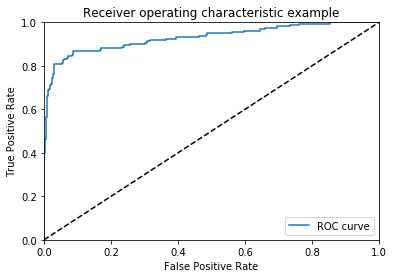

In [456]:
%pylab inline
import matplotlib.pyplot as plt
plt.plot(fpr_ary, tpr_ary, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [457]:
from sklearn.metrics import auc
auc(fpr_ary, tpr_ary)

0.9303257978723404

In [458]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(x_train, y_train)

clf2 = SVC(probability = True)
clf2.fit(x_train, y_train)

clf3 = LogisticRegression()
clf3.fit(x_train, y_train)

clf4 = RandomForestClassifier()
clf4.fit(x_train, y_train)

clf5 = GradientBoostingClassifier()
clf5.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


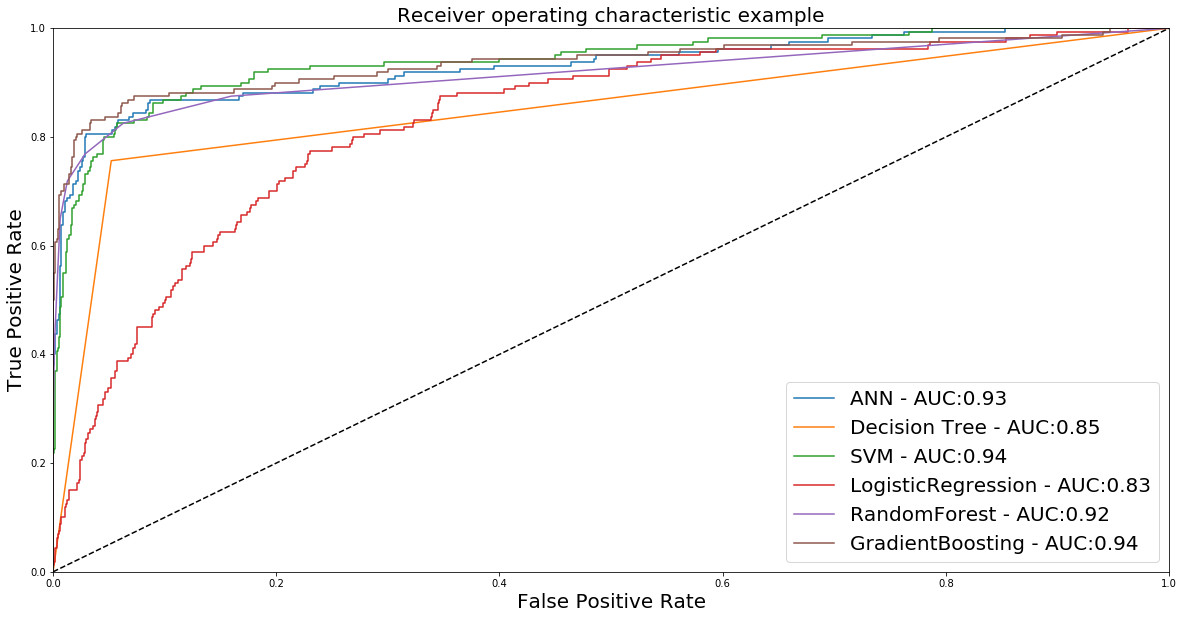

In [460]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize= [20,10])

for clf, title in zip(
    [model,clf1,clf2,clf3, clf4,clf5], 
    ['ANN','Decision Tree','SVM', 'LogisticRegression', 'RandomForest', 'GradientBoosting']):
    if title != 'ANN':
        probas_ = clf.fit(x_train, y_train).predict_proba(x_test)
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    else:
        y_pred = clf.predict(x_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

## Base64

In [463]:
import base64

with open("chi.jpg", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read())
#encoded_string

## 作業
- 目標: 建立一深度學習模型預測客戶是否流失
- 問題一: 請將資料區分為訓練與測試資料集
- 問題二: 請將資料標準化
- 問題三: 使用Keras 建立深度學習模型預測客戶是否流失
- 問題四: 評估模型準確度
- 問題五: 請繪製ROC Curve, 並求出 AUC
- 問題六: 請比較 ANN, SVM, Gradient Boosting, Random Forest, Logist Regression, Decision Tree 各模型的 AUC 與 ROC Curve


In [ ]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/Churn_Modelling.csv', header = 0 )
df.head()